In [1]:
from PDEFind_class_online import PDE_Findclass
import time, glob, os, pdb
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
from model_selection_IP3 import ODE_sim,learned_RHS_ODE
from PDE_FIND3 import print_pde
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition

#increase font size throughout
font = {'size'   : 20}
plt.rc('font', **font)

/var/folders/ns/b05k3sq933700lgv90qrzddw0000gs/T/ipykernel_17092/4070300615.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf')


# Example: learning equations for one dataset

In [2]:
# growth, death terms
rp = 0.001
rd = 0

dataset = ["logistic_ABM_sim_rp_"+str(rp)+"_rd_"+str(rd)+"_real50"]

In [3]:
#PDE-FIND values
#Where data is stored
data_dir = "../data/"
#Additional name in filenames
comp_str = ""
model_name = ""

#percentage of training, testing points
trainPerc = 0.5
valPerc = 0.5

#degree of library
deg = 4

#Learning algorithm
algo_name = 'Greedy'

#pruning percentage
prune_level = 0

num_eqns = 3
#save_learned_eqns = True
#save_xi = True
#save_learned_xi = True

#number of equations to learn
reals = 10

## Perform EQL Pipeline

In [4]:
pf = PDE_Findclass(dataset,
                   comp_str,
                   model_name,
                   data_dir=data_dir,
                   reals=reals,
                   trainPerc = trainPerc,
                   valPerc = valPerc,
                   deg=deg,
                   prune_level = prune_level,
                   num_eqns=num_eqns,
                   algo_name = algo_name)

#Solve for xi for $real train-val splits
pf.train_val_ODEFind()

print("")

#determine which equation form is most-commonly recovered
pf.list_common_eqns()

Running 10 SinDy Simulations to determine learned equation
library is ['C^1', 'C^2', 'C^3', 'C^4']

Top Learned equation is:
dC/dt = 0.00096C^1    - 0.00096C^2   


## Plot learned equations against ABM data

Text(0, 0.5, 'Density')

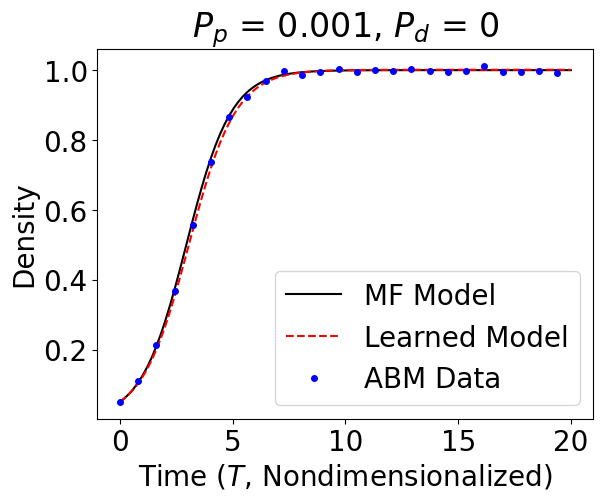

In [5]:
#Learned model
y_inferred = ODE_sim(pf.inferred_xi[0],learned_RHS_ODE,pf.t,np.array([0.05]),description=pf.description,deg=deg)
#Mean-field model
y_MF = ODE_sim(np.array([rp-rd,-rp]),learned_RHS_ODE,pf.t,np.array([0.05]),description=['C^1','C^2'],deg=2)

#plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(pf.t*(rp-rd),y_MF.T,'k',label = "MF Model")
ax.plot(pf.t*(rp-rd),y_inferred.T,'r--',label="Learned Model")
ax.plot(pf.t[::4]*(rp-rd),pf.y[::4],'b.',label = "ABM Data",markersize=8)

#Axes
plt.legend(loc=4)
ax.set_title("$P_p$ = " +str(rp)+", $P_d$ = " +str(rd))
ax.set_xlabel("Time ($T$, Nondimensionalized)")
ax.set_ylabel("Density")



## Now do the same for several parameter values

<>:80: SyntaxWarning: invalid escape sequence '\m'
<>:80: SyntaxWarning: invalid escape sequence '\m'
/var/folders/ns/b05k3sq933700lgv90qrzddw0000gs/T/ipykernel_17092/358980809.py:80: SyntaxWarning: invalid escape sequence '\m'
  ax2.set_title("$\mathcal{G\ (C)}$")


Running 10 SinDy Simulations to determine learned equation
library is ['C^1', 'C^2', 'C^3', 'C^4']
Top Learned equation is:
dC/dt = 0.00468C^1    - 0.00951C^2    - 0.0C^3   


/var/folders/ns/b05k3sq933700lgv90qrzddw0000gs/T/ipykernel_17092/358980809.py:61: MatplotlibDeprecationWarning: The InsetPosition class was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use Axes.inset_axes instead.
  ip = InsetPosition(ax, [0.57,0.125,0.4,0.4])


Running 10 SinDy Simulations to determine learned equation
library is ['C^1', 'C^2', 'C^3', 'C^4']
Top Learned equation is:
dC/dt = 0.02144C^1    - 0.04597C^2    + 0.00351C^3   


/var/folders/ns/b05k3sq933700lgv90qrzddw0000gs/T/ipykernel_17092/358980809.py:61: MatplotlibDeprecationWarning: The InsetPosition class was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use Axes.inset_axes instead.
  ip = InsetPosition(ax, [0.57,0.125,0.4,0.4])


Running 10 SinDy Simulations to determine learned equation
library is ['C^1', 'C^2', 'C^3', 'C^4']
Top Learned equation is:
dC/dt = 0.03988C^1    - 0.09228C^2    + 0.01807C^3   


/var/folders/ns/b05k3sq933700lgv90qrzddw0000gs/T/ipykernel_17092/358980809.py:61: MatplotlibDeprecationWarning: The InsetPosition class was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use Axes.inset_axes instead.
  ip = InsetPosition(ax, [0.57,0.125,0.4,0.4])


Running 10 SinDy Simulations to determine learned equation
library is ['C^1', 'C^2', 'C^3', 'C^4']
Top Learned equation is:
dC/dt = 0.15263C^1    - 0.4735C^2    + 0.29229C^3   


/var/folders/ns/b05k3sq933700lgv90qrzddw0000gs/T/ipykernel_17092/358980809.py:61: MatplotlibDeprecationWarning: The InsetPosition class was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use Axes.inset_axes instead.
  ip = InsetPosition(ax, [0.57,0.125,0.4,0.4])


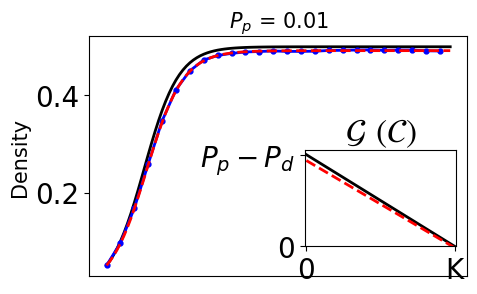

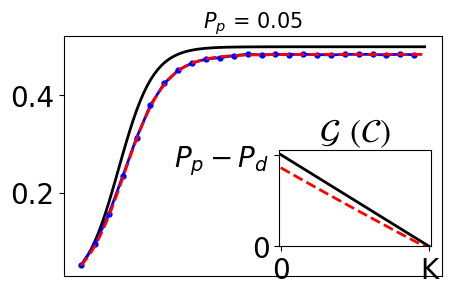

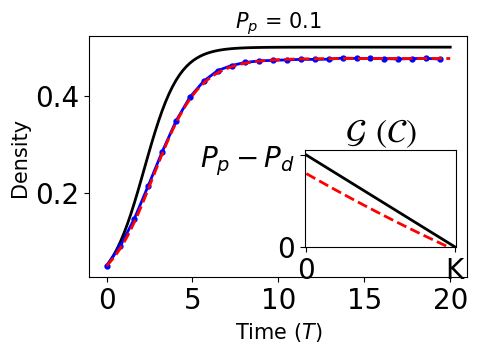

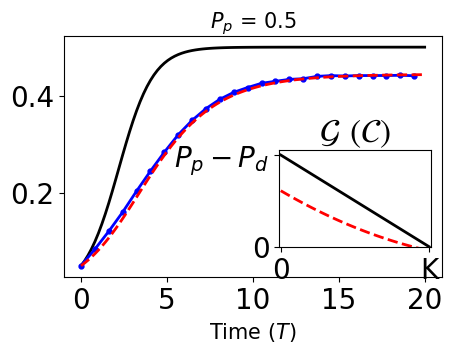

In [6]:
# growth, death terms
fontsize=15
rp_vec = [0.01,0.05,0.1,0.50]

## Initialize summary lists list of learned xi vectors
xi_learned = []
#list of mean squared error (MSE) between Mean-field model and ABM data
MF_MSE = []
#list of mean squared error (MSE) between learned model and ABM data
learned_MSE = []

#counter
count = 1

for rp in rp_vec:
    rd = rp/2.0

    dataset = ["logistic_ABM_sim_rp_"+str(rp)+"_rd_"+str(rd)+"_real50"]

    #Run pipeline
    pf = PDE_Findclass(dataset,
                   comp_str,
                   model_name,
                   data_dir=data_dir,
                   reals=reals,
                   trainPerc = trainPerc,
                   valPerc = valPerc,
                   deg=deg,
                   prune_level = prune_level,
                   num_eqns=num_eqns,
                   algo_name = algo_name)


    pf.train_val_ODEFind()
    pf.list_common_eqns()

    #Simulate mean-field and learned equations
    y_inferred = ODE_sim(pf.inferred_xi[0],learned_RHS_ODE,pf.t,np.array([0.05]),description=pf.description,deg=deg)
    y_MF = ODE_sim(np.array([rp-rd,-rp]),learned_RHS_ODE,pf.t,np.array([0.05]),description=['C^1','C^2'],deg=2)

    #plot ABM data, learned model, mean-field model
    fig = plt.figure(figsize=(9/2.0,6.5/2.0))
    ax = fig.add_subplot(1,1,1)
    ax.plot(pf.t*(rp-rd),y_MF.T,'k',linewidth=2,label = "MF Model")
    ax.plot(pf.t[::4]*(rp-rd),pf.y[::4],'b.-',label = "ABM Data",markersize=7,linewidth=2)
    ax.plot(pf.t*(rp-rd),y_inferred.T,'r--',linewidth=2,label="Learned Model")

    #Format figure
    ax.set_xticks(np.linspace(0,20,5))
    ax.set_title("$P_p$ = " +str(rp),fontsize=fontsize)#, $P_d$ = " +str(rd)
    if count > 2:
        ax.set_xlabel("Time ($T$)",fontsize=fontsize)
    else:
        ax.set_xticks([])
    if count % 2 == 1:
        ax.set_ylabel("Density",fontsize=fontsize)

    #Include inset of per-capita growth function
    ax2 = plt.axes([0,0,1,1])
    # Manually set the position and relative size of the inset axes within ax1
    ip = InsetPosition(ax, [0.57,0.125,0.4,0.4])
    ax2.set_axes_locator(ip)

    K = (rp-rd)/rp
    u_norm = np.linspace(1e-16,K,50)

    def y_MF_G(u):
        return ((rp-rd)*u-rp*u**2)/(rp-rd)

    ax2.plot(u_norm/K,y_MF_G(u_norm)/u_norm,label="MF Model",linewidth=2,color="k")

    xi = pf.inferred_xi[0]

    def y_learned_G(u):
        return (xi[0]*u + xi[1]*u**2 + xi[2]*u**3 + xi[3]*u**4)/(rp-rd)
    ax2.plot(u_norm/K,y_learned_G(u_norm)/u_norm,'r--',linewidth=2,label="Learned Model, $P_p$ = " + str(rp))

    ax2.set_xlim([-.01,1.01])
    ax2.set_ylim([0,1.05])
    ax2.set_title("$\mathcal{G\ (C)}$")
    ax2.set_xticks([0,1.0])
    ax2.set_xticklabels(['0','K'])
    ax2.set_yticks([0,1.0])
    ax2.set_yticklabels(['0','$P_p-P_d$'])
    
    plt.subplots_adjust(left=0.15,bottom=0.16,top=0.9,right = 0.99)
    
    #plt.savefig("case_study_1_BMD_comparison_"+str(count)+".pdf",format="pdf")
    
    #Save MSEs, learned xi vector
    xi_learned.append(pf.inferred_xi[0])
    MF_MSE.append(np.linalg.norm(np.squeeze(y_MF) - pf.y)/len(pf.y))
    learned_MSE.append(np.linalg.norm(np.squeeze(y_inferred) - pf.y)/len(pf.y))

    count+=1

## Table of inferred Equations

In [7]:
##Creates table that can be copied and pasted into a LaTeX table environment.

print('\\begin{tabular}{|c|c|l|l|}')
print('    \\hline')
print('    $P_p$ & \\ $P_d$ & \\ \\multicolumn{1}{c}{Mean-field Model (MSE)} & \\multicolumn{1}{c}{Learned Model (MSE)} \\\\ ')
print('    \\hline')

for i,rp in enumerate(rp_vec):
    rd = rp/2.0

    learned = print_pde(xi_learned[i][:,np.newaxis],["C","C^2","C^3","C^4"],ut="\\nicefrac{\\text{d}C}{\\text{d}t}")
    MF = print_pde(np.array([rp-rd,-rp])[:,np.newaxis],["C","C^2"],ut="\\nicefrac{\\text{d}C}{\\text{d}t}")

    print("    $" + str(rp) + "$ & $" + str(rd) + "$ & $" + MF + "$ ("+str(round(MF_MSE[i],4))+") & $" + learned +"$ ("+str(round(learned_MSE[i],4))+") \\\\")
    print("    \\hline")
print('\\end{tabular}')


\begin{tabular}{|c|c|l|l|}
    \hline
    $P_p$ & \ $P_d$ & \ \multicolumn{1}{c}{Mean-field Model (MSE)} & \multicolumn{1}{c}{Learned Model (MSE)} \\ 
    \hline
    $0.01$ & $0.005$ & $\nicefrac{\text{d}C}{\text{d}t} = 0.005C    - 0.01C^2   $ (0.0011) & $\nicefrac{\text{d}C}{\text{d}t} = 0.00468C    - 0.00951C^2    - 0.0C^3   $ (0.0001) \\
    \hline
    $0.05$ & $0.025$ & $\nicefrac{\text{d}C}{\text{d}t} = 0.025C    - 0.05C^2   $ (0.0026) & $\nicefrac{\text{d}C}{\text{d}t} = 0.02144C    - 0.04597C^2    + 0.00351C^3   $ (0.0002) \\
    \hline
    $0.1$ & $0.05$ & $\nicefrac{\text{d}C}{\text{d}t} = 0.05C    - 0.1C^2   $ (0.004) & $\nicefrac{\text{d}C}{\text{d}t} = 0.03988C    - 0.09228C^2    + 0.01807C^3   $ (0.0003) \\
    \hline
    $0.5$ & $0.25$ & $\nicefrac{\text{d}C}{\text{d}t} = 0.25C    - 0.5C^2   $ (0.01) & $\nicefrac{\text{d}C}{\text{d}t} = 0.15263C    - 0.4735C^2    + 0.29229C^3   $ (0.0006) \\
    \hline
\end{tabular}
